In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
csv_path=Path(r"C:\Users\ASUS\OneDrive\Desktop\data scicne fayllar\machine_learing_all.ipynb\csv\Mall_Customers.csv")
df = pd.read_csv(csv_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


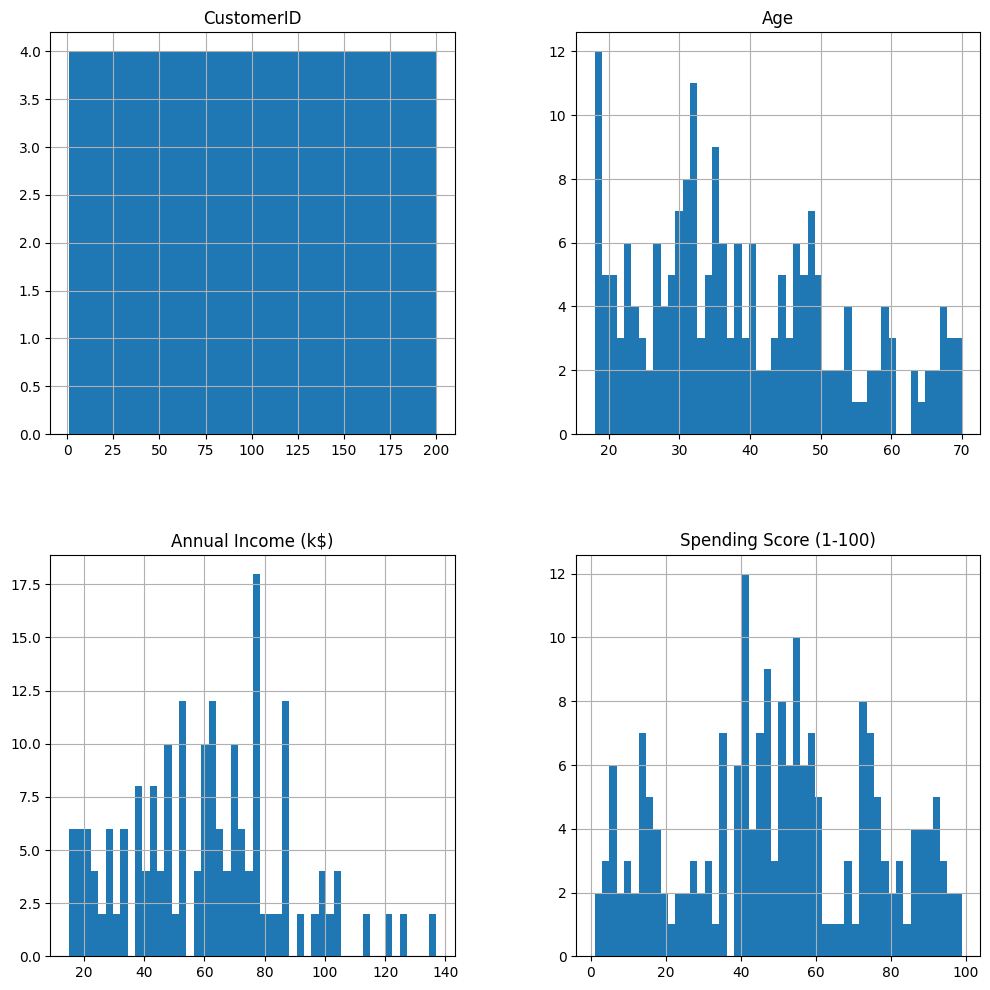

In [5]:
df.hist(bins=50,figsize=(12,12))
plt.show()

In [6]:
df.drop(columns="CustomerID", inplace=True)

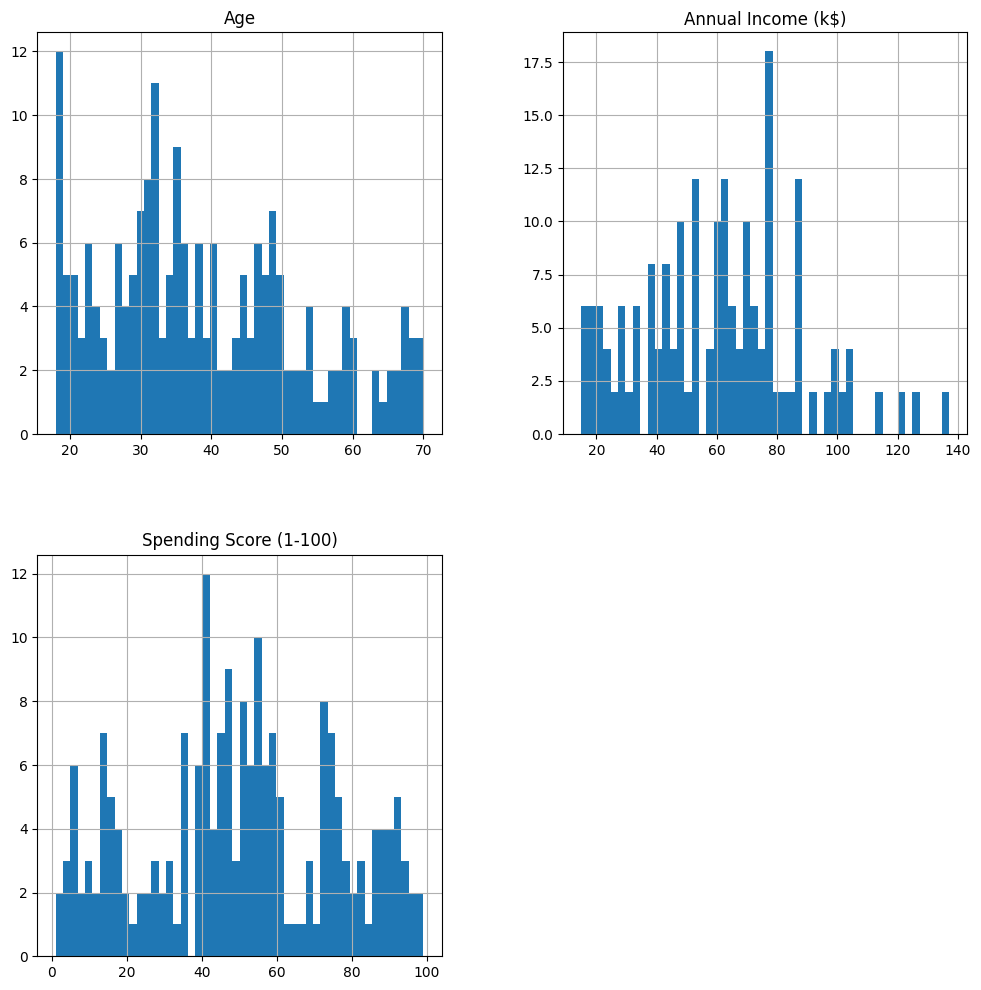

In [7]:
df.hist(bins=50,figsize=(12,12))
plt.show()

In [8]:

outlier1 = df['Annual Income (k$)'] == df['Annual Income (k$)'].max()
outlier2 = df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()

df = df.loc[~outlier1 & ~outlier2, :]
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


In [9]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df["Gender"] = df["Gender"].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  197 non-null    category
 1   Age                     197 non-null    int64   
 2   Annual Income (k$)      197 non-null    int64   
 3   Spending Score (1-100)  197 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 6.5 KB


In [12]:
df["Gender"].value_counts()
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Gender"]


0      1
1      1
2      0
3      0
4      0
      ..
193    0
194    0
195    0
196    0
197    1
Name: Gender, Length: 197, dtype: category
Categories (2, int64): [0, 1]

In [13]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df, 
    test_size=0.15,   
    random_state=42   
)

print(X_train.shape, X_test.shape)

(167, 4) (30, 4)


In [15]:
df.select_dtypes(include="number").columns
df.select_dtypes(include="category").columns

Index(['Gender'], dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_cols=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cat_cols=["Gender"]

num_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy="median")),
    ('scl', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy="most_frequent")),# data temizdi ehtiyac yoxdu
    ('scl', OneHotEncoder())
])

preprocessing = ColumnTransformer([
    ("NUM", num_pipeline, num_cols),
    ("CAT", cat_pipeline, cat_cols),
])

X_train_arr = preprocessing.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_arr, columns=preprocessing.get_feature_names_out())
X_train_tr.head()


,NUM__Age,NUM__Annual Income (k$),NUM__Spending Score (1-100),CAT__Gender_0,CAT__Gender_1
0,0.475969,-0.235064,-0.195269,1.0,0.0
1,-0.896984,0.276796,0.271142,0.0,1.0
2,-0.680202,1.536761,1.864710,0.0,1.0
3,-0.752463,-1.258786,1.281697,0.0,1.0
4,-0.607942,0.473666,0.854155,1.0,0.0


Kmeans


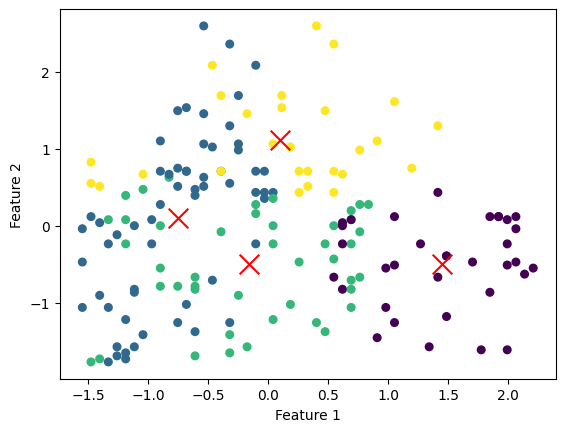

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means qruplarını yarat
km = KMeans(n_clusters=4, random_state=0)
y_pred = km.fit_predict(X_train_tr)

# Nəticəni vizuallaşdırmaq
plt.scatter(X_train_tr.iloc[:, 0], X_train_tr.iloc[:, 1], s=30, c=y_pred)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            marker='x', s=200, c='red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

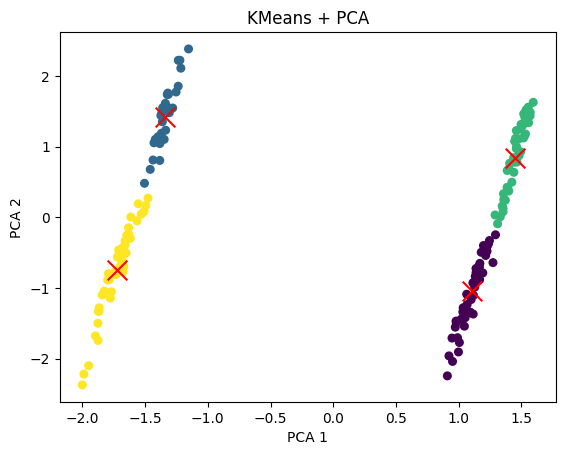

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Standartlaşdırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_tr)

# 2. PCA (2 ölçüyə endirək ki, çəkə bilək)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. KMeans
km = KMeans(n_clusters=4, random_state=0)
y_pred = km.fit_predict(X_pca)

# 4. Vizualizasiya
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, c=y_pred)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            marker='x', s=200, c='red')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans + PCA")
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, y_pred)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.670241850838728


In [19]:
df.shape

(197, 4)